# **DECISION TREES**

### **Import necessary libraries**

In [ ]:
import pandas as  pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

##**Job Level Prediction**

Let's use decision trees to predict the job level of an employee

Read our dataset and define which labels we use as features and which label we want to predict

In [ ]:
data = input("Enter the route of the data (Attriion.csv)")
df = pd.read_csv(data)

X = df.drop(columns = ["JobLevel","Unnamed: 0"])
y = df["JobLevel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth=5, splitter = "best")
tree1.fit(X_train,y_train)


Enter the route of the data (Attriion.csv)/content/Attrition.csv


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
np.unique(df["JobLevel"])

array([1, 2, 3, 4, 5])

In [ ]:
tree_predictions = tree1.predict(X_test)
acc = accuracy_score(tree_predictions,y_test)
print(f'the accuracy of the model is: {acc}')

the accuracy of the model is: 0.9375


Plot a tree representation

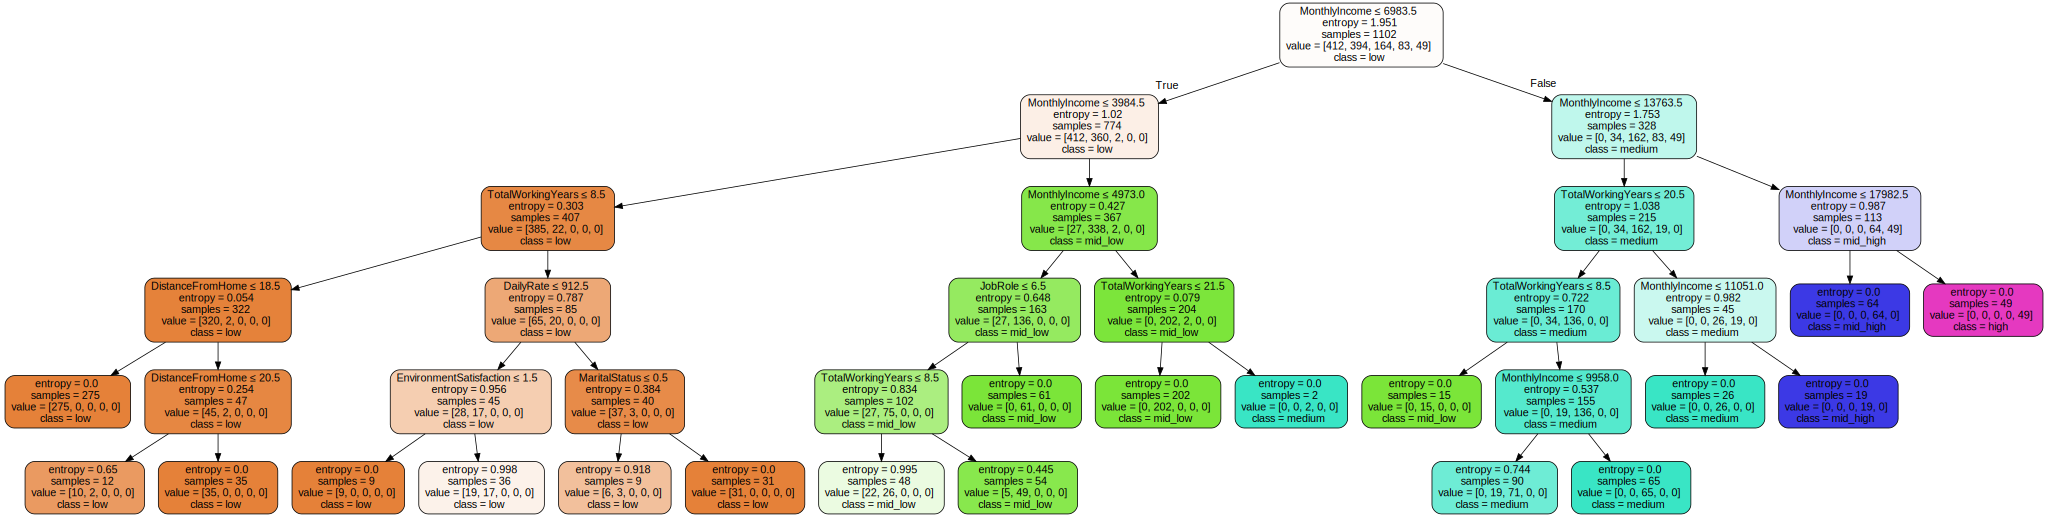

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(tree1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

dot_data = tree.export_graphviz(tree1, out_file=None, 
                         feature_names=X.keys(),  
                         class_names=["low","mid_low","medium","mid_high","high"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Let's do a grid search to find the best parameters for the model

In [ ]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'],'splitter':["best","random"], 'max_depth':[2,5,10,15,20]} 

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, parameters,verbose = 10)
grid.fit(X_train, y_train)
print('\n')
print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 1/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.796 total time=   0.0s
[CV 2/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 2/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 3/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.800 total time=   0.0s
[CV 4/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 4/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 5/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.786 total time=   0.0s
[CV 1/5; 2/30] START criterion=gini, max_depth=2, splitter

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

Train a decision tree model with the best parameters found in the grid search 

In [ ]:
tree2 = DecisionTreeClassifier(criterion = "entropy", max_depth=10, splitter = "best")
tree2.fit(X_train,y_train)

tree_predictions = tree2.predict(X_test)
acc = accuracy_score(tree_predictions,y_test)
print(f'the accuracy of the decision tree model is: {acc}')

the accuracy of the decision tree model is: 0.904891304347826


Plot the tree and how decision are made

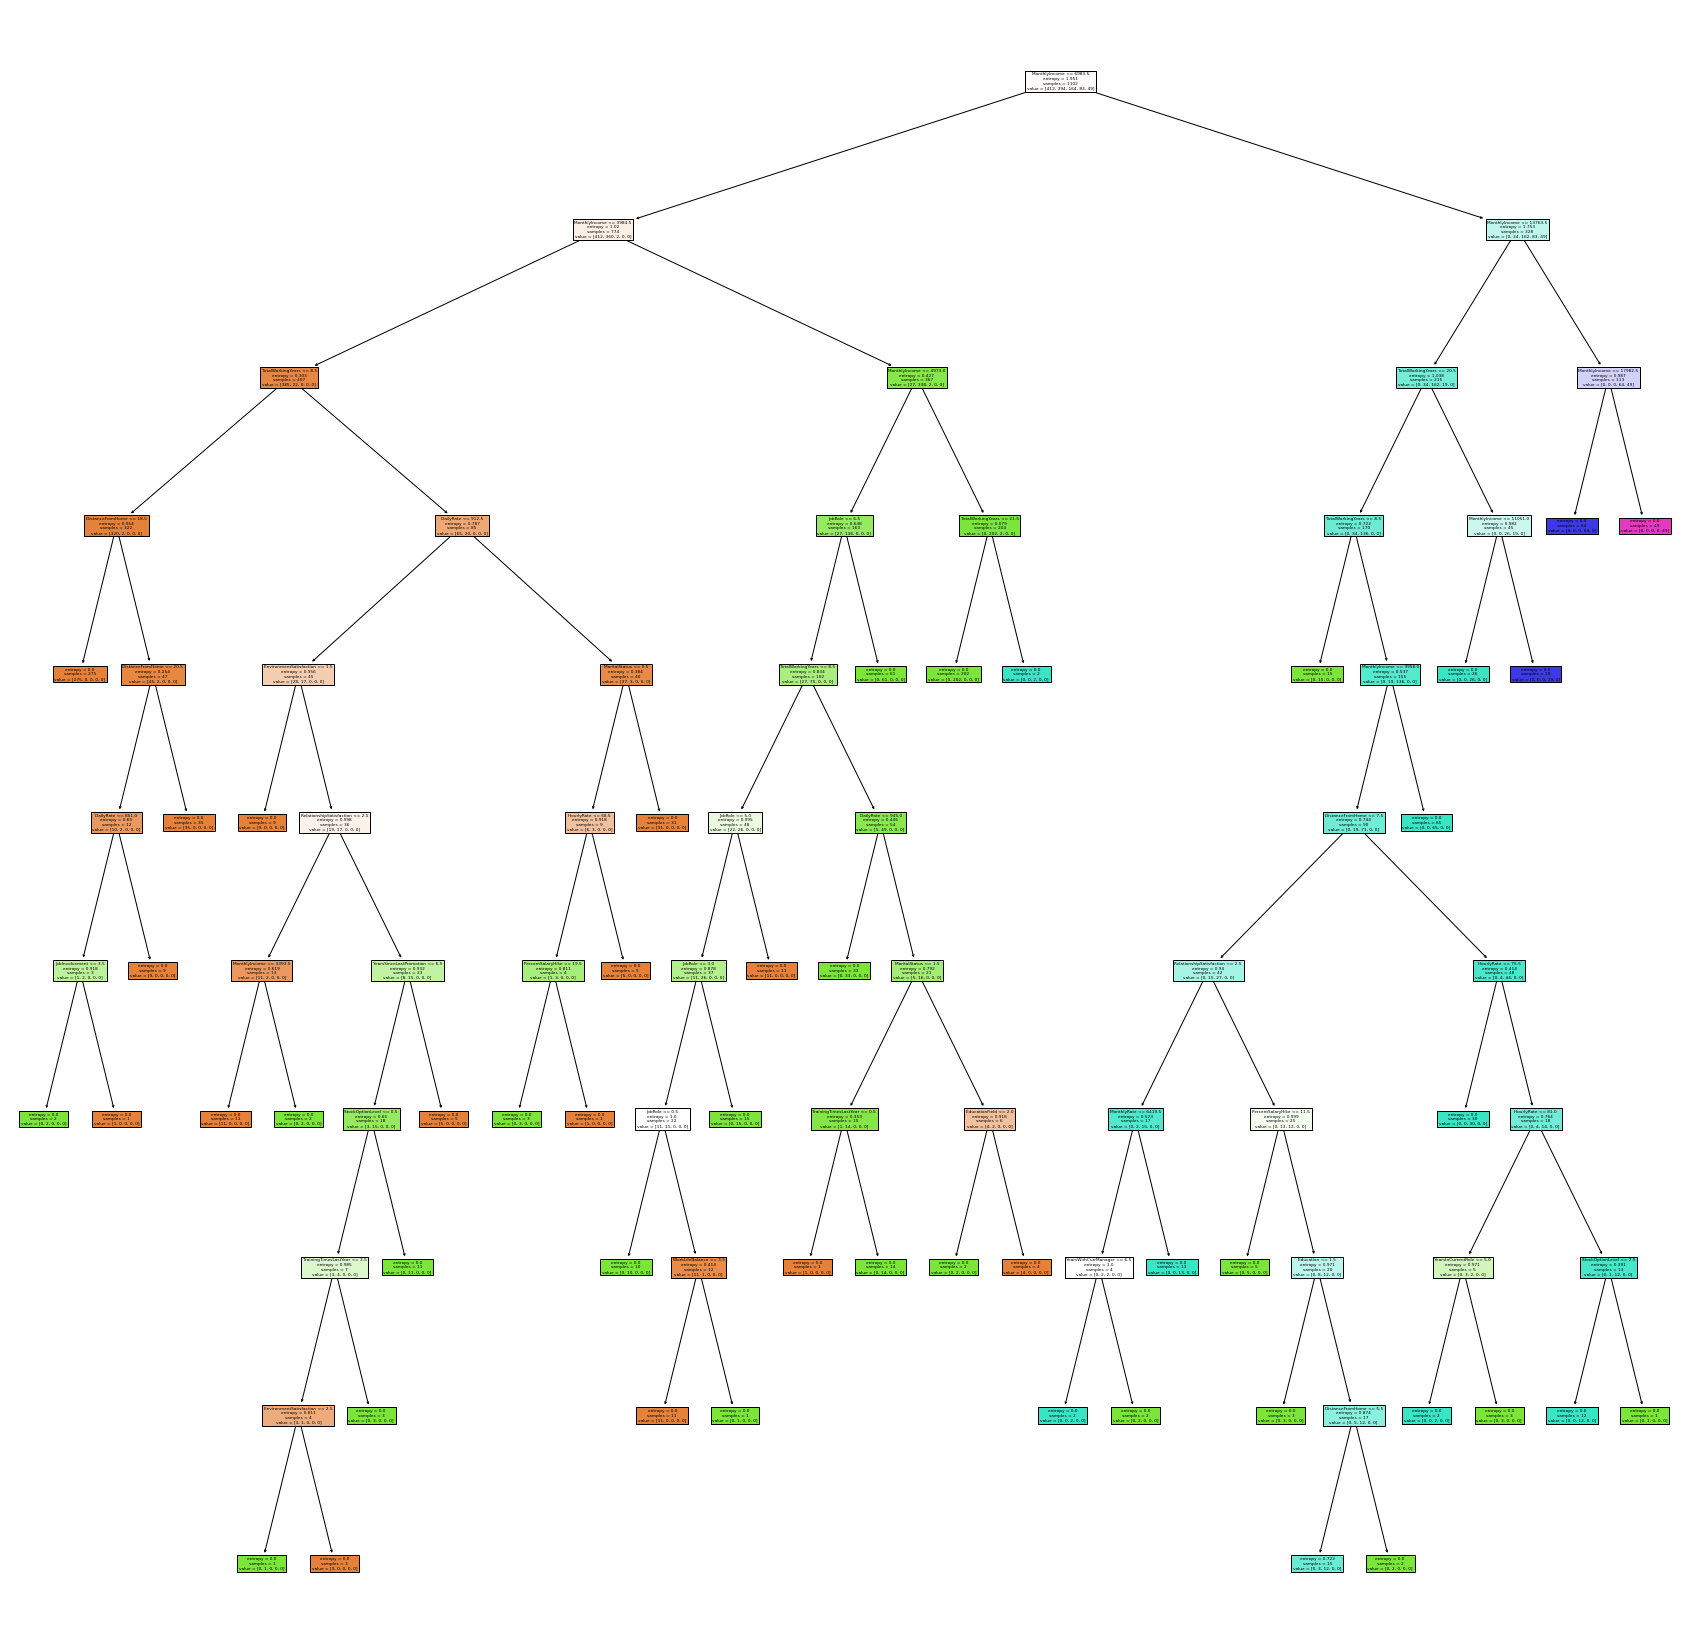

In [ ]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(tree2, feature_names = X.keys(),
                   filled=True)

Another more readable representation for the trees 

In [ ]:
text_representation = tree.export_text(tree2)
print(text_representation)

|--- feature_15 <= 6983.50
|   |--- feature_15 <= 3984.50
|   |   |--- feature_23 <= 8.50
|   |   |   |--- feature_5 <= 18.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  18.50
|   |   |   |   |--- feature_5 <= 20.50
|   |   |   |   |   |--- feature_3 <= 851.00
|   |   |   |   |   |   |--- feature_11 <= 3.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_11 >  3.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  851.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  20.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_23 >  8.50
|   |   |   |--- feature_3 <= 912.50
|   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |--- feature_21 <= 2.50
|   |   |   |   |   |   |--- feature_15 <= 3393.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_15 >  3393.50
|   |   |   |   |

Analyze the which features are more decesive in the model 

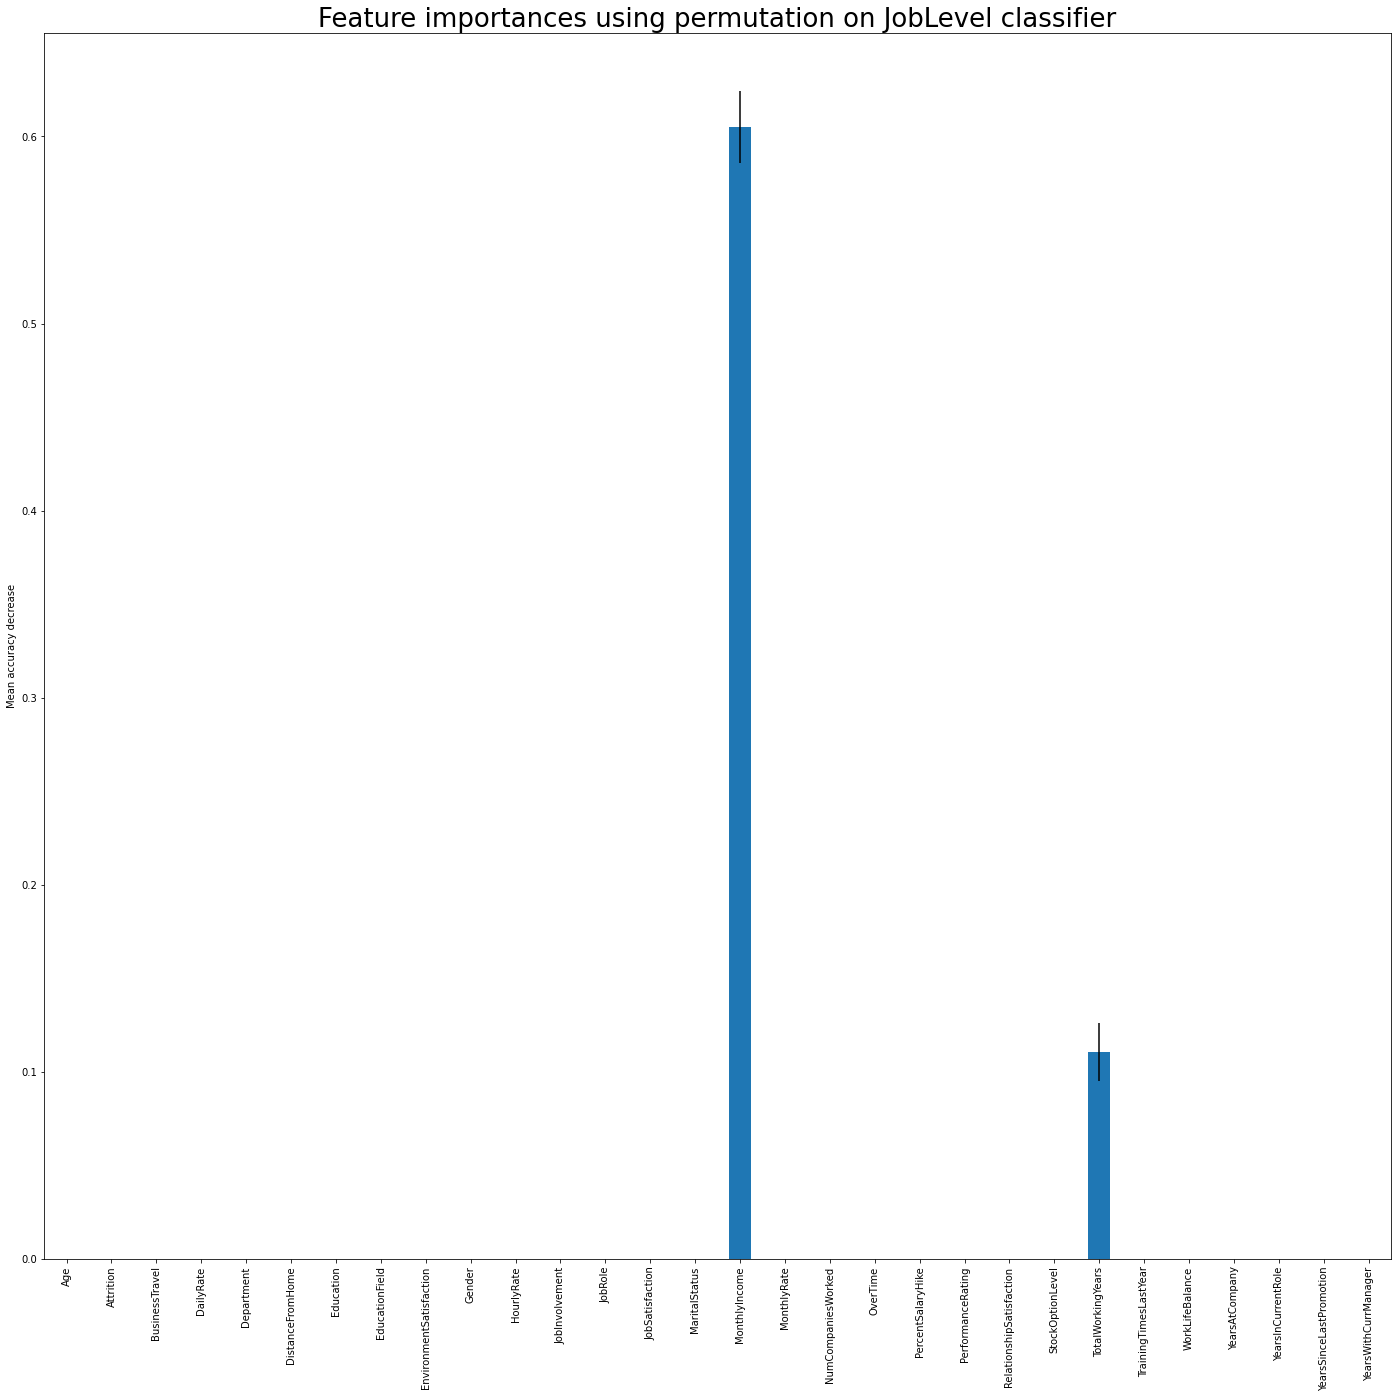

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    tree1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean,index = X.keys())


fig, ax = plt.subplots(figsize = (20,20))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on JobLevel classifier",{'fontsize':26,  })
ax.set_ylabel("Mean accuracy decrease")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
fig.tight_layout()
plt.show()

In [ ]:
X_no_income = pd.DataFrame((df["MonthlyIncome"],df["TotalWorkingYears"]))
y_no_income = df["JobLevel"]

What happen if some important features for the job level like the monthly income are not used? 



Define which features to train the model, descardint the job level and the monthlty income for this purpouse, and which will be the target feature to predict( JobLevel).

In [ ]:
X_f = pd.DataFrame((df["MonthlyIncome"],df["TotalWorkingYears"]))
y_f = df["JobLevel"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f.T, y_f, test_size=0.25, random_state=0)


Perform the grid search to find the best hyperparameters for the model 

In [ ]:
X_no_income = df.drop(columns = ["JobLevel", "MonthlyIncome","Unnamed: 0"])
y_no_income = df["JobLevel"]

X_train_ni, X_test_ni, y_train_ni, y_test_ni = train_test_split(X_no_income, y_no_income, test_size=0.25, random_state=0)


tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
tree1.fit(X_train_ni,y_train_ni)




parameters = {'criterion':['gini', 'entropy', 'log_loss'],'splitter':["best","random"], 'max_depth':[2,5,10,15,20]} 

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, parameters,verbose = 10)
grid.fit(X_train_ni, y_train_ni)
print('\n')
print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 1/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.661 total time=   0.0s
[CV 2/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 2/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.656 total time=   0.0s
[CV 3/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 3/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.645 total time=   0.0s
[CV 4/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 4/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 1/30] START criterion=gini, max_depth=2, splitter=best.................
[CV 5/5; 1/30] END criterion=gini, max_depth=2, splitter=best;, score=0.636 total time=   0.0s
[CV 1/5; 2/30] START criterion=gini, max_depth=2, splitter

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

Train a decision tree model wiht the best hyperparameters found in the grid search 

In [ ]:
tree_nmi = DecisionTreeClassifier(criterion = "gini", max_depth=5, splitter = "best")
tree_nmi.fit(X_train_ni,y_train_ni)

tree_predictions = tree_nmi.predict(X_test_ni)
acc = accuracy_score(tree_predictions,y_test_ni)
print(f'the accuracy of the model is: {acc}')

the accuracy of the model is: 0.6711956521739131


Tree representations of the decisions made to train the model.

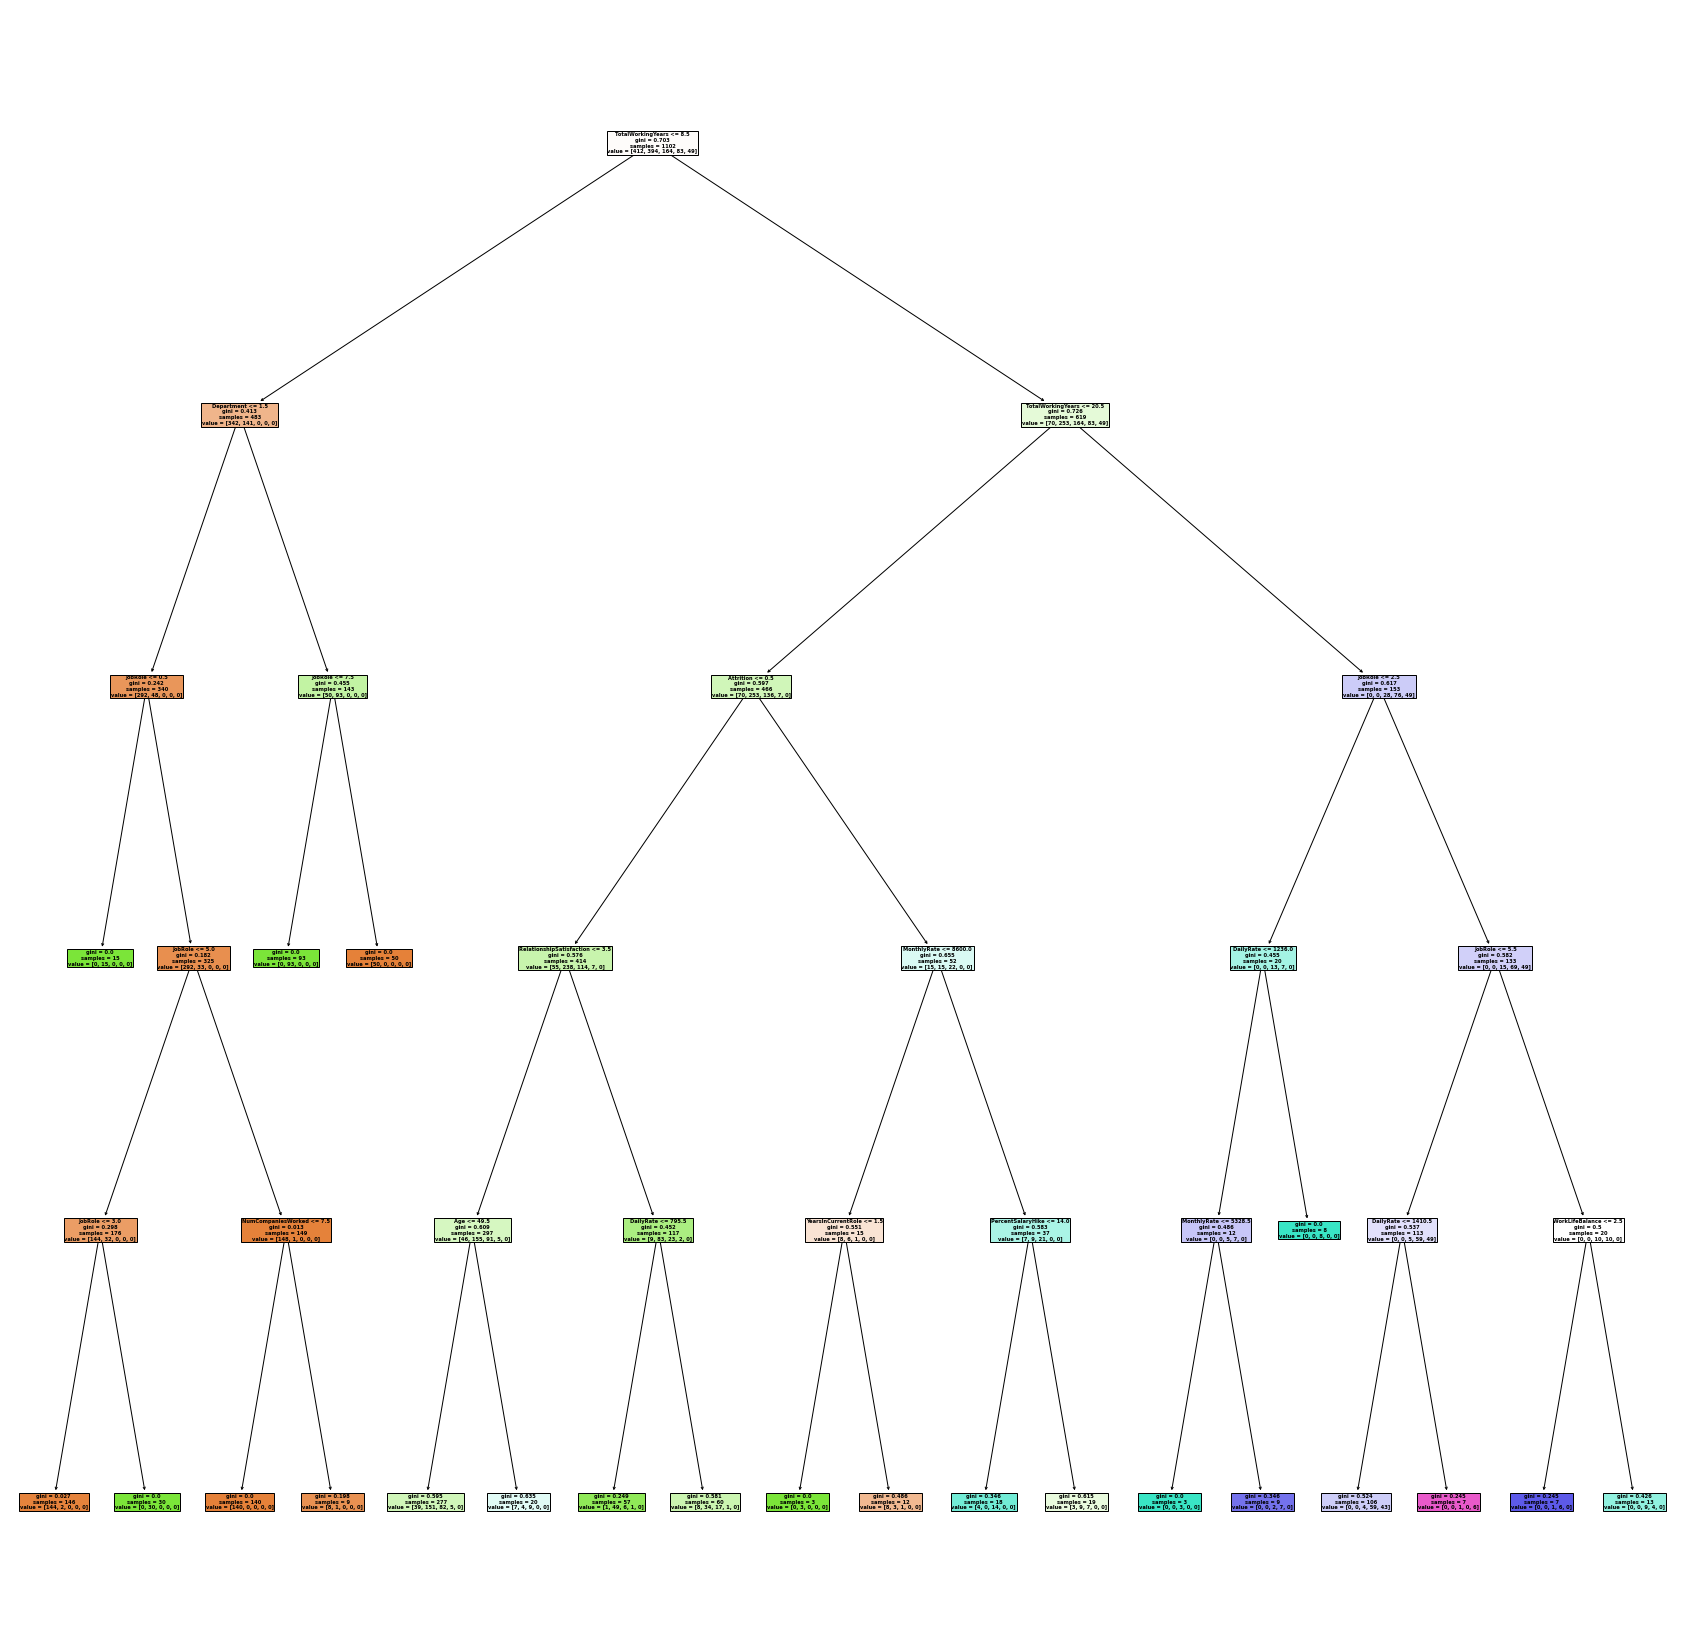

In [ ]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(tree_nmi, feature_names = X_no_income.keys(),
                   filled=True)

Visualize the most important components of the model 

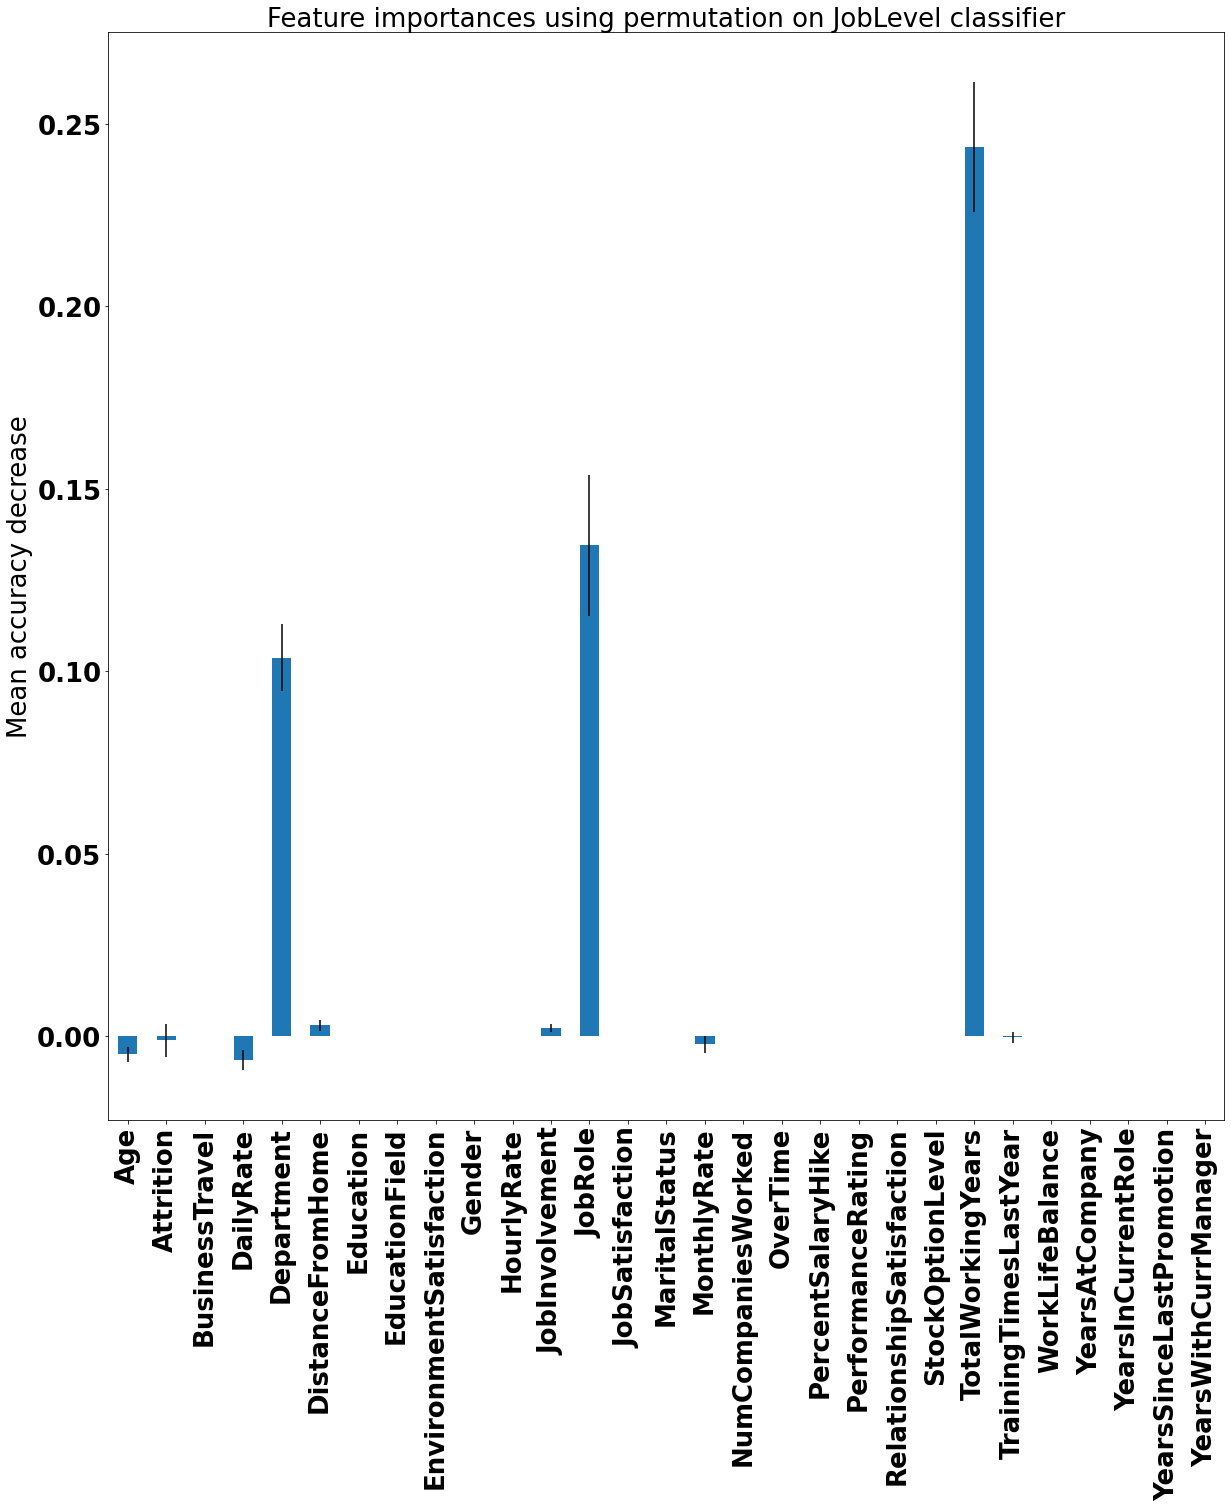

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    tree1, X_test_ni, y_test_ni, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean,index = X_no_income.keys())

fig, ax = plt.subplots(figsize = (20,20))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on JobLevel classifier",{'fontsize':26,  })
ax.set_ylabel("Mean accuracy decrease")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
plt.show()

Train a model with only the most decisive features in order to see if they really are the decisive ones that determine the good performance of the classifyer

In [ ]:
X_fni = pd.DataFrame((df["Department"],df["TotalWorkingYears"],df["JobRole"]))

y_fni = df["JobLevel"]

X_train_fni, X_test_fni, y_train_fni, y_test_fni = train_test_split(X_fni.T, y_fni, test_size=0.25, random_state=0)


tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
tree1.fit(X_train_fni,y_train_fni)

tree_predictions = tree1.predict(X_test_fni)
acc = accuracy_score(tree_predictions,y_test_fni)
print(f'the accuracy of the model is: {acc}')

the accuracy of the model is: 0.7038043478260869


From this trained models without the monthly income we can clearly see that the montly income is a decisive feature at the time of predicting the job level of an employee, because the accuracy drops dramatically from the original data

Let's use the decision trees to predict other features 

Predict Attrition Level of the employees:

##**Attrition Level Prediction**

In the first cell we prepare the features that will train the model and the feature that will be predicted.

Then we perform a grid search to find the best hyperparameters for the model.

In [ ]:
X_no_at = df.drop(columns = ["Attrition","Unnamed: 0"])
y_no_at = df["Attrition"]

X_train_at, X_test_at, y_train_at, y_test_at = train_test_split(X_no_at, y_no_at, test_size=0.25, random_state=0)


parameters = {'criterion':['gini', 'entropy', 'log_loss'],'splitter':["best","random"], 'max_depth':[2,5,10,15,20,25]} 

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, parameters,verbose = 10)
grid.fit(X_train_at, y_train_at)
print('\n')
print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START criterion=gini, max_depth=2, splitter=best.................
[CV 1/5; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.837 total time=   0.0s
[CV 2/5; 1/36] START criterion=gini, max_depth=2, splitter=best.................
[CV 2/5; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5; 1/36] START criterion=gini, max_depth=2, splitter=best.................
[CV 3/5; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.832 total time=   0.0s
[CV 4/5; 1/36] START criterion=gini, max_depth=2, splitter=best.................
[CV 4/5; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5; 1/36] START criterion=gini, max_depth=2, splitter=best.................
[CV 5/5; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.832 total time=   0.0s
[CV 1/5; 2/36] START criterion=gini, max_depth=2, splitter

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

train a decision tree model with the best computed parameters in the grid search 

In [ ]:
tree1_at = DecisionTreeClassifier(criterion = "entropy", max_depth=2, splitter = "random")
tree1_at.fit(X_train_at,y_train_at)

tree_predictions = tree1_at.predict(X_test_at)
acc = accuracy_score(tree_predictions,y_test_at)
print(f'the accuracy of the model is: {acc}')

the accuracy of the model is: 0.8396739130434783


Graphical representation of the decision tree model 

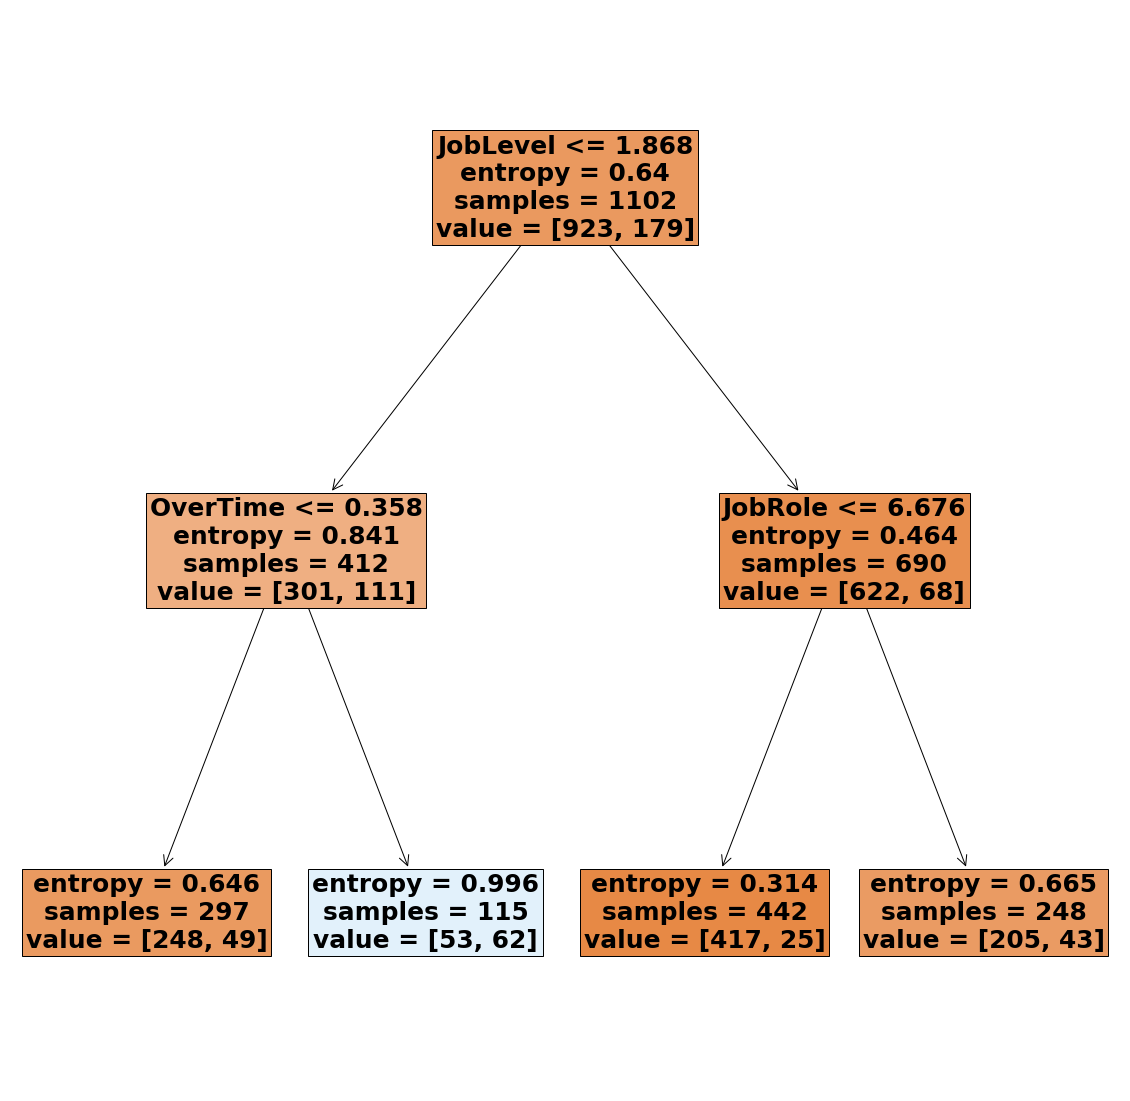

In [ ]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(tree1_at, feature_names = X_no_at.keys(),
                   filled=True)

Graphical representation of the most important features for the prediction of attriton level usin premutation importance 

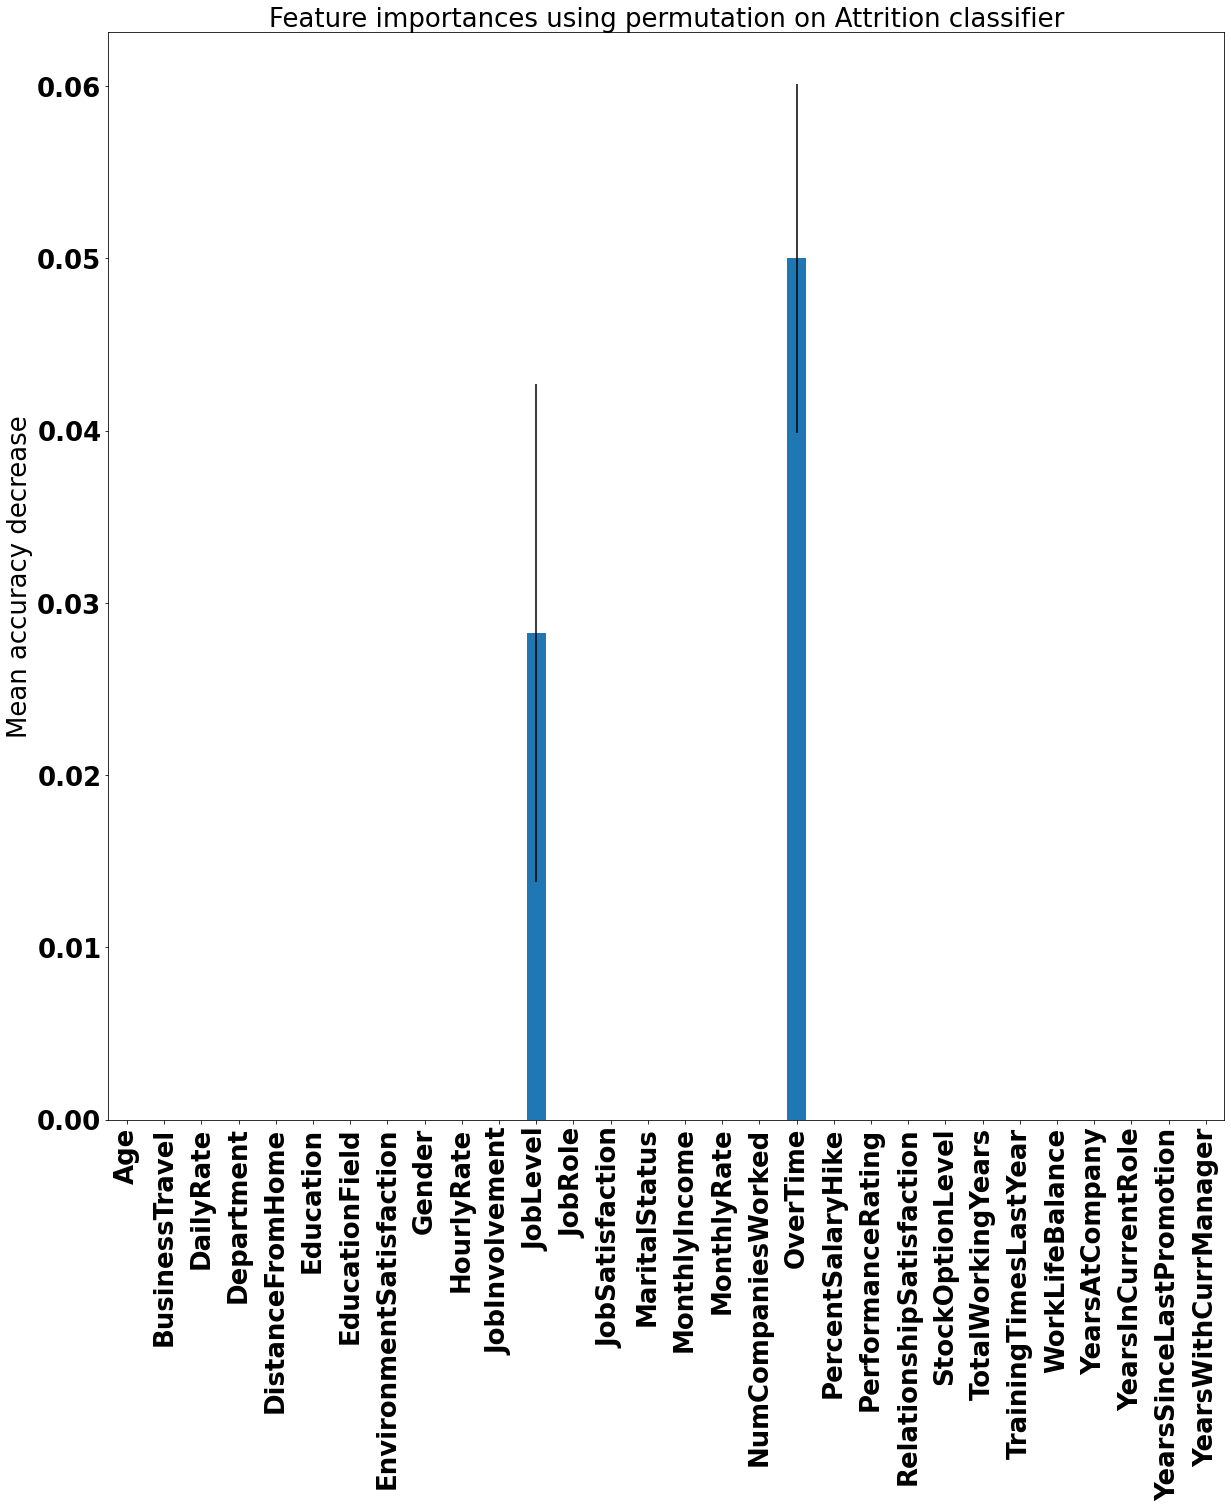

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    tree1_at, X_test_at, y_test_at, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean,index = X_no_at.keys())


fig, ax = plt.subplots(figsize = (20,20))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on Attrition classifier",{'fontsize':26})
ax.set_ylabel("Mean accuracy decrease")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
plt.show()

In [ ]:
X_fat = pd.DataFrame((df["JobInvolvement"],df["OverTime"]))

y_fat = df["Attrition"]

X_train_fat, X_test_fat, y_train_fat, y_test_fat = train_test_split(X_fat.T, y_fat, test_size=0.25, random_state=0)


tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
tree1.fit(X_train_fat,y_train_fat)

tree_predictions = tree1.predict(X_test_fat)
acc = accuracy_score(tree_predictions,y_test_fat)
print(f'the accuracy of the model is: {acc}')

the accuracy of the model is: 0.842391304347826


## **Conclusions**

**Advantages of decision tree classifyer:**

Decision trees are a very powerfull and usefull tool to predict features, because is a very light model that let you predict features from a huge dataset and with a good performance with low computation. This last feature is evident in the grid search where we fit 180 times the model with different parameters and the training is almost instantany. The grid search also let's you to analyze the features that influence more in deciding a variable for the mdoel, so the decision tree classifyer is not a completly black box that you don't know what it's using for prediction.



**Disadvantages of the decision tree classifyer:**

On the other hand this model is not usefull to predict continuous variables like the monthly income of an employee. Also decision trees are very unstable and an small variation in the data can lead to a big change in the structure of the tree and the performance of the model. 